In [38]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/aerial-cactus-identification/sample_submission.csv
/kaggle/input/aerial-cactus-identification/train.zip
/kaggle/input/aerial-cactus-identification/test.zip
/kaggle/input/aerial-cactus-identification/train.csv


In [39]:
base_dir = '../input/aerial-cactus-identification/'
train_dir = os.path.join(base_dir, "train.zip")
test_dir = os.path.join(base_dir, "test.zip")

In [40]:
os.listdir('../input/aerial-cactus-identification')

['sample_submission.csv', 'train.zip', 'test.zip', 'train.csv']

In [41]:
import zipfile
with zipfile.ZipFile(train_dir,"r") as z:
    z.extractall()
with zipfile.ZipFile(test_dir,"r") as z:
    z.extractall()

In [42]:
os.listdir()

['__notebook_source__.ipynb', 'test', 'train']

In [43]:
train_dir = './train'
test_dir = './test'
csv_path = '../input/aerial-cactus-identification/train.csv'
sample_csv_path = '../input/aerial-cactus-identification/sample_submission.csv'
df = pd.read_csv(csv_path)

In [44]:
df.tail(5)

,id,has_cactus
17495,ffede47a74e47a5930f81c0b6896479e.jpg,0
17496,ffef6382a50d23251d4bc05519c91037.jpg,1
17497,fff059ecc91b30be5745e8b81111dc7b.jpg,1
17498,fff43acb3b7a23edcc4ae937be2b7522.jpg,0
17499,fffd9e9b990eba07c836745d8aef1a3a.jpg,1


In [45]:
fildnaems = df['id']
fildnaems.head()

0    0004be2cfeaba1c0361d39e2b000257b.jpg
1    000c8a36845c0208e833c79c1bffedd1.jpg
2    000d1e9a533f62e55c289303b072733d.jpg
3    0011485b40695e9138e92d0b3fb55128.jpg
4    0014d7a11e90b62848904c1418fc8cf2.jpg
Name: id, dtype: object

In [46]:
file_paths = [os.path.join(train_dir, fname) for fname in fildnaems]
file_paths[:5]

['./train/0004be2cfeaba1c0361d39e2b000257b.jpg',
 './train/000c8a36845c0208e833c79c1bffedd1.jpg',
 './train/000d1e9a533f62e55c289303b072733d.jpg',
 './train/0011485b40695e9138e92d0b3fb55128.jpg',
 './train/0014d7a11e90b62848904c1418fc8cf2.jpg']

In [47]:
train_df = pd.DataFrame(data ={'id' : file_paths, 'has_cactus':df['has_cactus']})
train_df.head()

,id,has_cactus
0,./train/0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,./train/000c8a36845c0208e833c79c1bffedd1.jpg,1
2,./train/000d1e9a533f62e55c289303b072733d.jpg,1
3,./train/0011485b40695e9138e92d0b3fb55128.jpg,1
4,./train/0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [48]:
sample_df = pd.read_csv(sample_csv_path)
sample_df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


In [49]:
train_df = train_df.astype(np.str)

In [50]:
train_df = train_df[:-1000]
test_df = train_df[-1000:]

In [51]:
len(sample_df), len(train_df), len(test_df)

(4000, 16500, 1000)

# Load Packages

In [52]:
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Explore

In [53]:
path = train_df['id'][1]
path

'./train/000c8a36845c0208e833c79c1bffedd1.jpg'

In [54]:
img_pil = Image.open(path)
image = np.array(img_pil)

image.shape

(32, 32, 3)

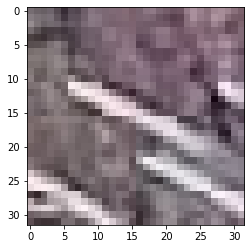

In [55]:
plt.imshow(image)
plt.show()

# Hyperparameter

In [56]:
input_shape = (32, 32, 3)
batch_size = 32
num_classes = 2
num_epochs = 10

learning_rate = 0.01

# Model

In [57]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(64, (3, 3), padding='same')(inputs)
net = layers.Conv2D(64, (3, 3), padding='same')(net)
net = layers.Conv2D(64, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)

net = layers.Conv2D(128, (3, 3), padding='same')(net)
net = layers.Conv2D(128, (3, 3), padding='same')(net)
net = layers.Conv2D(128, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(256, (3, 3), padding='same')(net)
net = layers.Conv2D(256, (3, 3), padding='same')(net)
net = layers.Conv2D(256, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net)

In [58]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate),
              metrics=['accuracy'])

# Data Preprocess

In [59]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255.
)

In [60]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='id',
    y_col='has_cactus',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='id',
    y_col='has_cactus',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='sparse'
)

Found 16500 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


# Train

In [61]:
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/10


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


516/516 [==============================] - 19s 34ms/step - loss: 1.2392 - accuracy: 0.7302 - val_loss: 8.5898 - val_accuracy: 0.7440
Epoch 2/10
516/516 [==============================] - 18s 35ms/step - loss: 0.3921 - accuracy: 0.7844 - val_loss: 7.1227 - val_accuracy: 0.7440
Epoch 3/10
516/516 [==============================] - 18s 35ms/step - loss: 0.2670 - accuracy: 0.8897 - val_loss: 1.7859 - val_accuracy: 0.7550
Epoch 4/10
516/516 [==============================] - 18s 35ms/step - loss: 0.2262 - accuracy: 0.9026 - val_loss: 1.5597 - val_accuracy: 0.7490ac - ETA: 0s - loss: 0.2263 - accuracy:  - ETA: 0s - loss: 0.2262 - accuracy
Epoch 5/10
516/516 [==============================] - 17s 34ms/step - loss: 0.2229 - accuracy: 0.9120 - val_loss: 0.5149 - val_accuracy: 0.8250
Epoch 6/10
516/516 [==============================] - 17s 34ms/step - loss: 0.1778 - accuracy: 0.9305 - val_loss: 0.3392 - val_accuracy: 0.8850
Epoch 7/10
516/516 [==============================] - 17s 33ms/step - l

# Evaluate

In [65]:
preds= []
for fname in tqdm_notebook(sample_df['id']):
    path = os.path.join(test_dir, fname)
    img_pil = Image.open(path)
    image = np.array(img_pil)
    
    pred= model.predict(image[tf.newaxis, ...])
    pred = np.argmax(pred)
    preds.append(pred)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/4000 [00:00<?, ?it/s]

In [68]:
submission_df = pd.DataFrame(data = {'id' : sample_df['id'], 'has_cactus' : preds})

In [69]:
submission_df.to_csv('sample_submission.csv', index=False)